# 07-Projeto-07-Classificacao-de-roupas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('matplotlib')

import random

In [2]:
fsh_mnst_train = pd.read_csv('datasets/fashion-mnist-train.csv')
fsh_mnst_test = pd.read_csv('datasets/fashion-mnist-test.csv')

In [3]:
training = np.array(fsh_mnst_train, dtype = 'float32')
testing = np.array(fsh_mnst_test, dtype = 'float32')

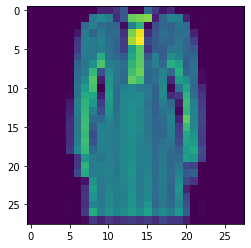

In [4]:
i = random.randint(0, 60000)
plt.imshow(training[i, 1:].reshape((28,28)))
#plt.imshow(training[i, 1:].reshape((28,28)), cmap='gray');


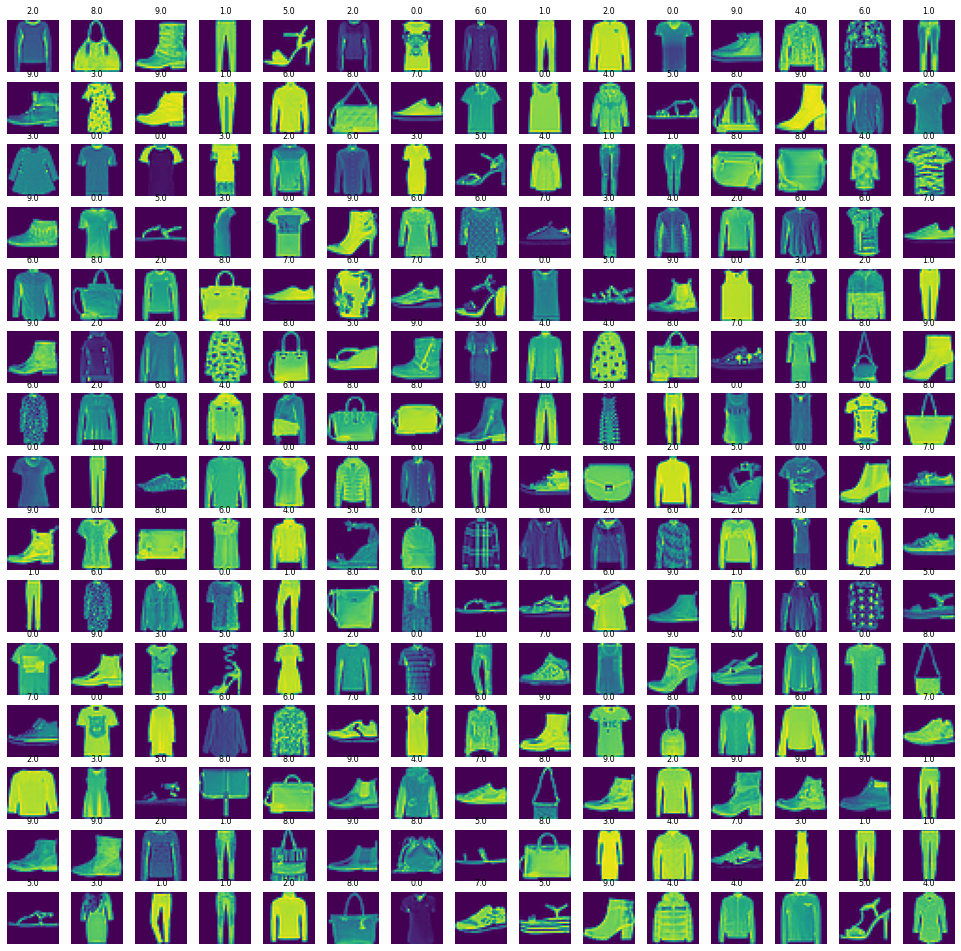

In [6]:
w_grid, l_grid = 15, 15
fig, axes = plt.subplots(l_grid, w_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(training)

for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fsh_mnst_train.iloc[:, 1:],
                                                    fsh_mnst_train.iloc[:, 0],
                                                    random_state=21, test_size = .35)

X_train, X_test = np.array(X_train, dtype='float32'), np.array(X_test, dtype='float32')
y_train, y_test = np.array(y_train, dtype='float32'), np.array(y_test, dtype='float32')

#escalando os valores
X_train, X_test = X_train/255, X_test/255


X_valid = testing[:, 1:] / 255
y_valid = testing[:, 0]

In [44]:
# Convertendo para formato de batching
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_valid = X_valid.reshape(X_valid.shape[0], *(28, 28, 1))

### Criando o modelo

In [45]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(layers.MaxPool2D(2, 2))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(layers.MaxPool2D(2, 2))

cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(64, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))


In [46]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [47]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [48]:
epochs = 150
history = cnn.fit(X_train, y_train, batch_size=512, epochs=epochs)

Epoch 1/150
77/77 [==============================] - 8s 106ms/step - loss: 1.0536 - accuracy: 0.6277
Epoch 2/150
77/77 [==============================] - 8s 106ms/step - loss: 0.5758 - accuracy: 0.7852
Epoch 3/150
77/77 [==============================] - 8s 107ms/step - loss: 0.4890 - accuracy: 0.8242
Epoch 4/150
77/77 [==============================] - 8s 106ms/step - loss: 0.4414 - accuracy: 0.8427
Epoch 5/150
77/77 [==============================] - 8s 110ms/step - loss: 0.4048 - accuracy: 0.8565
Epoch 6/150
77/77 [==============================] - 8s 106ms/step - loss: 0.3757 - accuracy: 0.8677
Epoch 7/150
77/77 [==============================] - 8s 109ms/step - loss: 0.3568 - accuracy: 0.8737
Epoch 8/150
77/77 [==============================] - 8s 107ms/step - loss: 0.3383 - accuracy: 0.8791
Epoch 9/150
77/77 [==============================] - 8s 105ms/step - loss: 0.3278 - accuracy: 0.8830
Epoch 10/150
77/77 [==============================] - 8s 106ms/step - loss: 0.3158 - accura

77/77 [==============================] - 9s 112ms/step - loss: 0.0194 - accuracy: 0.9948
Epoch 82/150
77/77 [==============================] - 9s 112ms/step - loss: 0.0231 - accuracy: 0.9932
Epoch 83/150
77/77 [==============================] - 8s 107ms/step - loss: 0.0224 - accuracy: 0.9932
Epoch 84/150
77/77 [==============================] - 9s 112ms/step - loss: 0.0212 - accuracy: 0.9938
Epoch 85/150
77/77 [==============================] - 9s 112ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 86/150
77/77 [==============================] - 9s 113ms/step - loss: 0.0231 - accuracy: 0.9927
Epoch 87/150
77/77 [==============================] - 8s 108ms/step - loss: 0.0299 - accuracy: 0.9892
Epoch 88/150
77/77 [==============================] - 9s 112ms/step - loss: 0.0255 - accuracy: 0.9918
Epoch 89/150
77/77 [==============================] - 8s 110ms/step - loss: 0.0252 - accuracy: 0.9919
Epoch 90/150
77/77 [==============================] - 8s 109ms/step - loss: 0.0159 - accuracy: 

In [49]:
evaluation = cnn.evaluate(X_test, y_test)

657/657 [==============================] - 2s 3ms/step - loss: 0.6424 - accuracy: 0.9049


In [50]:
evaluation

[0.6423884630203247, 0.9048571586608887]

In [51]:
evaluation_valid = cnn.evaluate(X_valid, y_valid)

313/313 [==============================] - 1s 3ms/step - loss: 0.6001 - accuracy: 0.9051


In [52]:
evaluation_valid

[0.6000902056694031, 0.9050999879837036]

In [53]:
prediction_classes = cnn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


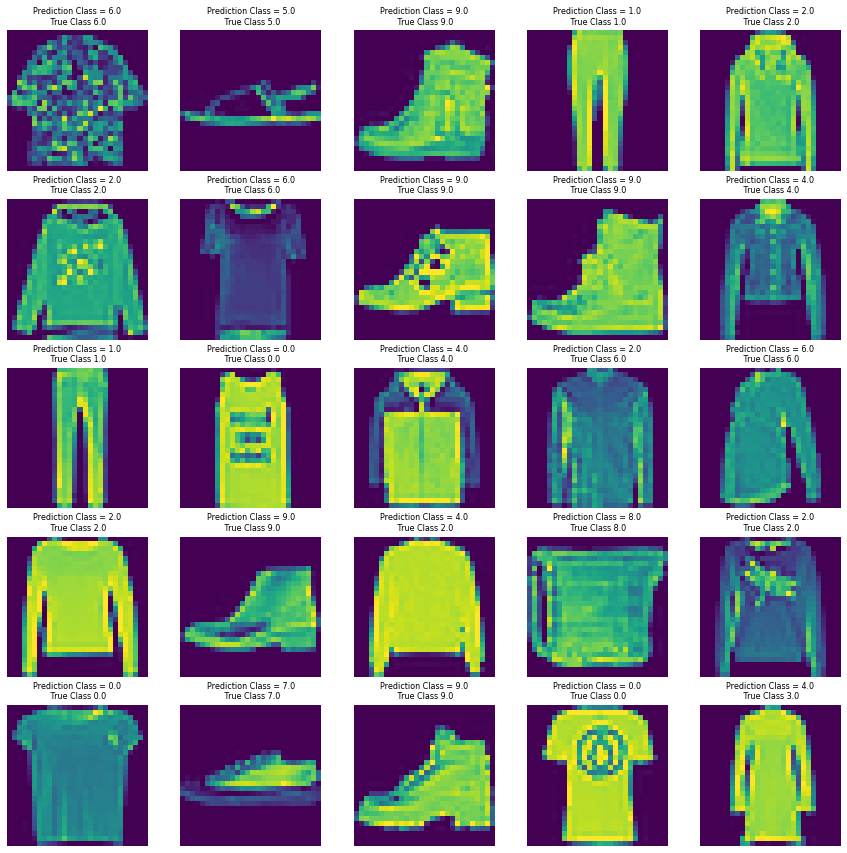

In [58]:
w_grid, l_grid = 5, 5
fig, axes = plt.subplots(l_grid, w_grid, figsize=(15,15))
axes = axes.ravel()


for i in np.arange(0, w_grid * l_grid):
    axes[i].imshow(X_test[i].reshape((28,28)))
    axes[i].set_title('Prediction Class = {:0.1f}\n True Class {:0.1f}'.format(prediction_classes[i], y_test[i]), fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.2)

<AxesSubplot:>

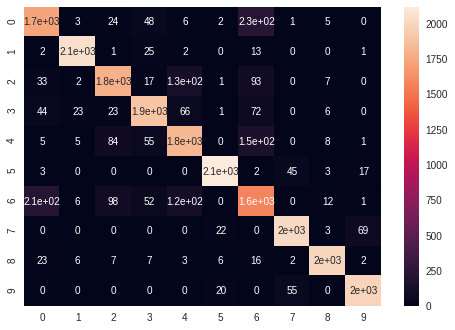

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('seaborn')
cm = confusion_matrix(y_test, prediction_classes)
sns.heatmap(cm, annot=True)

In [62]:
cm

array([[1731,    3,   24,   48,    6,    2,  231,    1,    5,    0],
       [   2, 2055,    1,   25,    2,    0,   13,    0,    0,    1],
       [  33,    2, 1797,   17,  131,    1,   93,    0,    7,    0],
       [  44,   23,   23, 1900,   66,    1,   72,    0,    6,    0],
       [   5,    5,   84,   55, 1829,    0,  149,    0,    8,    1],
       [   3,    0,    0,    0,    0, 2117,    2,   45,    3,   17],
       [ 207,    6,   98,   52,  121,    0, 1575,    0,   12,    1],
       [   0,    0,    0,    0,    0,   22,    0, 2012,    3,   69],
       [  23,    6,    7,    7,    3,    6,   16,    2, 1999,    2],
       [   0,    0,    0,    0,    0,   20,    0,   55,    0, 1987]])

In [65]:
n_classes = 10
target_names = ['Class {}'.format(i) for i in range(n_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [66]:
print(classification_report(y_test, prediction_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.84      0.84      2051
     Class 1       0.98      0.98      0.98      2099
     Class 2       0.88      0.86      0.87      2081
     Class 3       0.90      0.89      0.90      2135
     Class 4       0.85      0.86      0.85      2136
     Class 5       0.98      0.97      0.97      2187
     Class 6       0.73      0.76      0.75      2072
     Class 7       0.95      0.96      0.95      2106
     Class 8       0.98      0.97      0.97      2071
     Class 9       0.96      0.96      0.96      2062

    accuracy                           0.90     21000
   macro avg       0.91      0.90      0.90     21000
weighted avg       0.91      0.90      0.91     21000

